FREE FALL

Problem description:

The air resistance (drag force) on a ball of mass m in free flight is
given by a model as $F_d = \mathrm{C}V^2$, where the constant represents
the drag coefficient and V is the velocity in meters per second.
If the ball is dropped from rest position (here in the first case, h= 500 m)
above the ground, compute the speed at which it hits the ground.

Resultant of forces


\begin{equation}
F_{R,y} = F_D - F_g,
\end{equation}

where the forces are given by

\begin{equation}
m\frac{dV}{dt}_y = \mathrm{C}V^2 - mg.
\end{equation}

The velocity is defined as

\begin{equation}
V_y = \left\{\frac{mg}{\mathrm{C}} \left[ 1-exp\left(\frac{2{\rm C}(y-y_0)}{m}\right)  \right]\right\}^{0.5},
\end{equation}

and acceleration is given by

\begin{equation}
a_y = \frac{dV}{dt}.
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class FreeFaller:

    def __init__(self,m=0.2,Cd=2e-4,deltaY=500):
        self.m = m
        self.Cd = Cd
        self.g = 9.81
        self.deltaY = deltaY
                   
    def velocity(self):
        A = self.m*self.g/self.Cd
        B = 2*self.Cd/self.m
        
        return np.sqrt(A*(1-np.exp(-B*self.deltaY)))

    def acceleration(self):
        with np.errstate(divide='ignore', invalid='ignore'):
            self.time = self.deltaY/self.velocity()
        
        return np.gradient(self.velocity(), self.time)

In [2]:
# Create a particle called prt_0 to solve the problem setup.    
prt_0 = FreeFaller()    

print('According to the  problem, for a specific high value')
print('Velocity: {:0.2f} m/s\n'.format(prt_0.velocity()))

According to the  problem, for a specific high value
Velocity: 78.75 m/s



In [3]:
# Max altitude to lauch a particle
max_H = 3500
deltaY_ = np.linspace(0,max_H,1000)

# Definition of three different particle with different drag coeff.
Cds = [0.5e-4,2.0e-4,4.0e-4]

# Mechanism for objects creation 
list_of_freeFallers = []
for Cd in Cds:
    list_of_freeFallers.append(FreeFaller(Cd=Cd,deltaY=deltaY_))

''' 
# Mechanism for objects creation
# This is equal what happen in the above lines 
Cds = [ FreeFaller(Cd=0.5e-4,deltaY=deltaY_),
      FreeFaller(Cd=2.0e-4,deltaY=deltaY_),
      FreeFaller(Cd=4.0e-4,deltaY=deltaY_)]'
'''       

velocity_curves = list(map(FreeFaller.velocity,list_of_freeFallers))
acceleration_curves = list(map(FreeFaller.acceleration,list_of_freeFallers))


In [4]:
# PLOTS SETUP

# Define fonts
font = {'family': 'serif'}

fontLegend = {'family': 'serif',
      'weight': 'normal',
      'size': 14,
      }

fontLegend2 = {'family': 'serif',
      'weight': 'normal',
      'size': 13,
      }

fontLegend3 = {'family': 'serif',
      'weight': 'normal',
      'size': 11,
      }
# Define fonts of plots [Math symbols and expressions]
fonts1 = ["serif"]
fonts2 = ["stix","stixsans","cm"]

for font1,font2 in zip(fonts1,fonts2):
    plt.rcParams["font.family"] = font1
    plt.rcParams["mathtext.fontset"] = font2
    plt.rcParams["font.size"] = 14


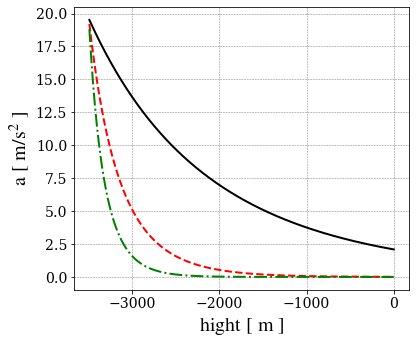

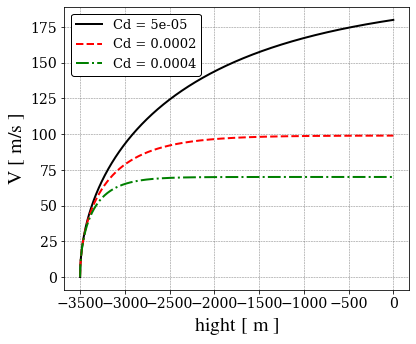

In [5]:
colors = ['black','red','green']
l_styles = ['-','--','-.']

for v_curves, a_curves,color, l_style, cd in zip(velocity_curves,acceleration_curves,colors,l_styles,Cds):
    fig = plt.figure(2,figsize=(6,5),facecolor='w')
    plt.plot(deltaY_-max_H,a_curves ,color = color, \
               linestyle=l_style,lw =2,label = 'Cd = ' + str(cd))
    plt.ylabel(r'$\rm a\ [\ \rm m/s^2\ ]$',fontsize=20, fontdict=font)
    plt.xlabel('$\\rm hight\ [\ m\ ] $',fontsize=20, fontdict=font)
    plt.grid(color='gray', linestyle='--',lw=.5)
    plt.tight_layout()

    fig = plt.figure(1,figsize=(6,5),facecolor='w')
    plt.plot(deltaY_-max_H,v_curves ,color = color, \
               linestyle=l_style,lw =2,label = 'Cd = ' + str(cd))
    plt.ylabel(r'$\rm V\ [\ \rm m/s\ ]$',fontsize=20, fontdict=font)
    plt.xlabel('$\\rm hight\ [\ m\ ] $',fontsize=20, fontdict=font)
    plt.grid(color='gray', linestyle='--',lw=.5)
    plt.tight_layout()

    
leg = plt.legend(loc='upper left',framealpha = 1,edgecolor='k',prop=fontLegend2)        
plt.show()